In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torchvision import models
from torchvision import transforms as tf
import torch.nn.functional as F


In [2]:
vgg = models.vgg19(pretrained=True).features

for param in vgg.parameters():
  param.requires_grad_(False)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


In [3]:
device = torch.device("cpu")

if torch.cuda.is_available():
  device = torch.device("cuda")

vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [4]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

In [5]:
def transformation(img):

  tasks = tf.Compose([tf.Resize(256),
                      tf.ToTensor(),
                      tf.Normalize(mean, std)])
  
  img = tasks(img)
  img = img.unsqueeze(0)

  return img

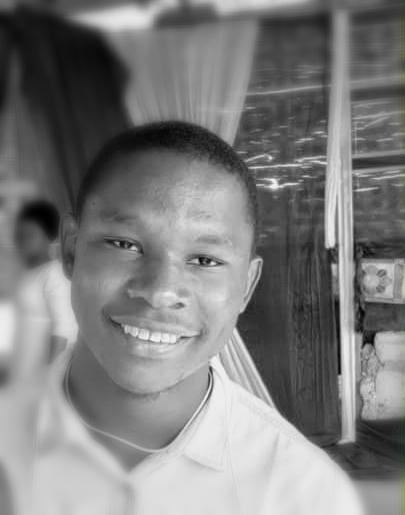

In [6]:
content_img = Image.open("/content/drive/My Drive/Colab Notebooks/Datasets/Photography.jpg").convert("RGB")
style_img = Image.open("/content/drive/My Drive/Colab Notebooks/Datasets/starry_night.jpg").convert("RGB")

content_img

#TODO
#Get the number of channels of the images before conversion to RGB

In [7]:
content_img.size

(405, 515)

In [8]:
list(content_img.getdata())

[(109, 109, 109),
 (109, 109, 109),
 (108, 108, 108),
 (110, 110, 110),
 (110, 110, 110),
 (110, 110, 110),
 (109, 109, 109),
 (108, 108, 108),
 (106, 106, 106),
 (105, 105, 105),
 (103, 103, 103),
 (100, 100, 100),
 (97, 97, 97),
 (93, 93, 93),
 (89, 89, 89),
 (84, 84, 84),
 (81, 81, 81),
 (78, 78, 78),
 (76, 76, 76),
 (73, 73, 73),
 (72, 72, 72),
 (71, 71, 71),
 (70, 70, 70),
 (70, 70, 70),
 (70, 70, 70),
 (71, 71, 71),
 (71, 71, 71),
 (72, 72, 72),
 (73, 73, 73),
 (72, 72, 72),
 (73, 73, 73),
 (73, 73, 73),
 (72, 72, 72),
 (71, 71, 71),
 (71, 71, 71),
 (68, 68, 68),
 (66, 66, 66),
 (65, 65, 65),
 (63, 63, 63),
 (61, 61, 61),
 (60, 60, 60),
 (58, 58, 58),
 (56, 56, 56),
 (55, 55, 55),
 (53, 53, 53),
 (51, 51, 51),
 (50, 50, 50),
 (49, 49, 49),
 (49, 49, 49),
 (48, 48, 48),
 (50, 50, 50),
 (49, 49, 49),
 (52, 52, 52),
 (55, 55, 55),
 (56, 56, 56),
 (60, 60, 60),
 (64, 64, 64),
 (68, 68, 68),
 (70, 70, 70),
 (72, 72, 72),
 (76, 76, 76),
 (77, 77, 77),
 (79, 79, 79),
 (81, 81, 81),
 (81

In [9]:
style_img.size

(1500, 1200)

In [10]:
list(style_img.getdata())

[(107, 175, 220),
 (102, 170, 215),
 (95, 162, 207),
 (85, 149, 195),
 (74, 136, 183),
 (63, 124, 171),
 (58, 114, 163),
 (55, 108, 158),
 (30, 80, 131),
 (41, 87, 139),
 (55, 98, 151),
 (71, 110, 165),
 (85, 122, 177),
 (95, 130, 186),
 (100, 135, 191),
 (104, 136, 193),
 (85, 144, 202),
 (84, 140, 201),
 (87, 142, 207),
 (96, 149, 219),
 (99, 148, 224),
 (81, 126, 207),
 (45, 87, 171),
 (17, 55, 140),
 (35, 72, 153),
 (69, 103, 177),
 (110, 141, 208),
 (129, 160, 217),
 (130, 161, 208),
 (131, 161, 199),
 (141, 170, 202),
 (153, 183, 211),
 (139, 163, 227),
 (141, 165, 227),
 (142, 169, 224),
 (143, 174, 220),
 (145, 179, 216),
 (147, 184, 213),
 (147, 189, 211),
 (145, 192, 208),
 (162, 211, 226),
 (138, 191, 207),
 (104, 159, 180),
 (75, 132, 159),
 (60, 119, 153),
 (64, 123, 163),
 (79, 137, 183),
 (89, 150, 197),
 (90, 124, 185),
 (99, 134, 192),
 (113, 148, 204),
 (127, 163, 215),
 (138, 174, 222),
 (142, 179, 221),
 (144, 179, 217),
 (143, 179, 213),
 (131, 167, 199),
 (129, 16

In [11]:
content_img = transformation(content_img).to(device)
style_img = transformation(style_img).to(device)

In [12]:
style_img.shape

torch.Size([1, 3, 256, 320])

In [13]:
style_img

tensor([[[[-0.4911, -1.0733, -1.3644,  ..., -1.1932, -1.4158, -1.9467],
          [-0.3712, -0.7479, -1.5357,  ..., -1.0219, -1.2617, -1.9295],
          [-0.4739, -0.6623, -0.8678,  ..., -0.9363, -1.1932, -1.8439],
          ...,
          [-1.2617, -1.4158, -1.4843,  ..., -1.7412, -1.7583, -1.7069],
          [-1.0390, -1.1247, -0.9877,  ..., -1.5185, -1.6898, -1.7412],
          [-1.5699, -1.7754, -1.7583,  ..., -1.4329, -1.4158, -1.5870]],

         [[ 0.7654, -0.0049, -0.5651,  ..., -0.3725, -0.9678, -1.8256],
          [ 0.9055,  0.3277, -0.7402,  ..., -0.1275, -0.6352, -1.6506],
          [ 0.7829,  0.3978, -0.0574,  ...,  0.0476, -0.3375, -1.3529],
          ...,
          [-1.1779, -1.3354, -1.4055,  ..., -1.1779, -1.2479, -1.1954],
          [-0.9503, -1.0378, -0.8978,  ..., -0.9328, -1.1779, -1.2304],
          [-1.4755, -1.7031, -1.6856,  ..., -0.8627, -0.8978, -1.0728]],

         [[ 1.7860,  1.0714,  0.6008,  ...,  0.6531, -0.2532, -1.2467],
          [ 1.9254,  1.4025,  

In [14]:
def tensor_to_image(tensor):
  image = tensor.clone().detach()
  image = image.cpu().numpy().squeeze()

  image = image.transpose(1, 2, 0)

  image *= np.array(std) + np.array(mean)
  image = image.clip(0, 1)

  return image

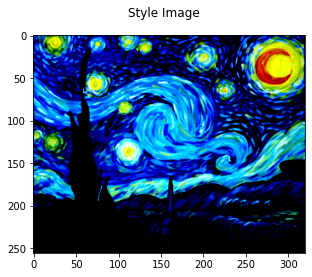

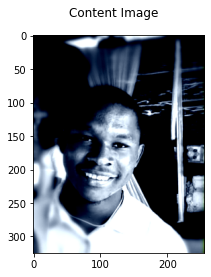

In [15]:
img = tensor_to_image(style_img)
fig = plt.figure()
fig.suptitle("Style Image")
plt.imshow(img)

img = tensor_to_image(content_img)
fig = plt.figure()
fig.suptitle("Content Image")
plt.imshow(img)


In [16]:
LAYERS_OF_INTEREST = {
    '0': 'conv1_1',
    '5': 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
}

In [17]:
def apply_model_and_extract_features(image, model):
  x = image

  features = {}

  for name, layer in model._modules.items():

    x = layer(x)

    if name in LAYERS_OF_INTEREST:
      features[LAYERS_OF_INTEREST[name]] = x

  return features



In [18]:
content_img_features = apply_model_and_extract_features(content_img, vgg)

style_img_features = apply_model_and_extract_features(style_img, vgg)

In [19]:
content_img_features

{'conv1_1': tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           ...,
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00]],
 
          [[4.1491e-01, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
            0.0000e+00, 0.0000e+00],
           [7.4596e-01, 3.1278e-02, 7.4993e-02,  ..., 5.6350e-01,
            6.1311e-01, 0.0000e+00],
           [8.3847e-01, 0.0000e+00, 0.0000e+00,  ..., 3.8715e-01,
            4.0398e-01, 0.0000e+00],
           ...,
           [0.0000e+00, 3.2

In [20]:
style_img_features

{'conv1_1': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0424, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[1.0981, 2.3346, 0.0000,  ..., 0.6069, 1.4742, 0.0000],
           [0.7188, 3.5122, 1.7084,  ..., 1.5588, 3.9618, 0.0000],
           [0.1903, 2.5042, 1.1728,  ..., 0.1743, 3.5810, 0.0000],
           ...,
           [4.0778, 1.6157, 1.1527,  ..., 0.9860, 0.5818, 0.0000],
           [3.1517, 0.0000, 0.0000,  ..., 0.9383, 1.1974, 0.0000],
           [4.8241, 3.0066, 3.1164,  ..., 2.6634, 3.1179, 0.2706]],
 
          [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0

In [21]:
def calculate_gram_matrix(tensor):

  _, channels, height, width = tensor.size()

  tensor = tensor.view(channels, height*width)

  gram_matrix = torch.mm(tensor, tensor.t())

  gram_matrix = gram_matrix.div(channels* height * width)

  return gram_matrix

In [22]:
style_features_gram_matrix = {layer: calculate_gram_matrix(style_img_features[layer]) for layer in style_img_features}



In [23]:
style_features_gram_matrix

{'conv1_1': tensor([[1.2129e-03, 1.0880e-03, 8.0375e-05,  ..., 3.0239e-03, 4.5621e-04,
          1.5102e-03],
         [1.0880e-03, 1.5716e-02, 6.8127e-05,  ..., 1.5031e-02, 2.6219e-03,
          6.0778e-03],
         [8.0375e-05, 6.8127e-05, 1.2540e-04,  ..., 4.1115e-06, 6.5670e-05,
          1.6760e-04],
         ...,
         [3.0239e-03, 1.5031e-02, 4.1115e-06,  ..., 6.2786e-02, 9.8608e-03,
          1.3948e-02],
         [4.5621e-04, 2.6219e-03, 6.5670e-05,  ..., 9.8608e-03, 4.0372e-03,
          2.2530e-03],
         [1.5102e-03, 6.0778e-03, 1.6760e-04,  ..., 1.3948e-02, 2.2530e-03,
          1.1564e-02]], device='cuda:0'),
 'conv2_1': tensor([[0.0324, 0.0070, 0.0156,  ..., 0.0287, 0.0033, 0.0075],
         [0.0070, 0.0402, 0.0095,  ..., 0.0496, 0.0092, 0.0092],
         [0.0156, 0.0095, 0.0290,  ..., 0.0305, 0.0023, 0.0053],
         ...,
         [0.0287, 0.0496, 0.0305,  ..., 0.2002, 0.0207, 0.0261],
         [0.0033, 0.0092, 0.0023,  ..., 0.0207, 0.0231, 0.0102],
         [0.

In [24]:
weights = {'conv1_1': 1.0, 'conv2_1': 0.75, 'conv3_1': 0.35, 
           'conv4_1': 0.25, 'conv5_1': 0.15}

In [25]:
target = content_img.clone().requires_grad_(True).to(device)

optimizer = optim.Adam([target], lr=0.003)

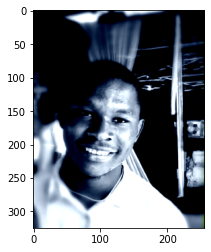

In [26]:
plt.figure()

plt.imshow(tensor_to_image(target))

# Training

In [27]:
for i in range(1, 3000):

  target_features = apply_model_and_extract_features(target, vgg)

  content_loss = F.mse_loss(target_features['conv4_2'], 
                             content_img_features['conv4_2'])
  
  style_loss = 0
  for layer in weights:

    target_feature = target_features[layer]

    target_gram_matrix = calculate_gram_matrix(target_feature)

    style_gram_matrix = style_features_gram_matrix[layer]

    layer_loss = F.mse_loss(target_gram_matrix, style_gram_matrix)

    layer_loss *= weights[layer]

    _, channels, height, width = target_feature.shape

    style_loss += layer_loss

  total_loss = 1000000 * style_loss + content_loss

  if i % 50 ==0:

    print("Eopch {}:, style loss; {:4f}, Content Loss: {:4f}".format(i, style_loss, content_loss))

    optimizer.zero_grad()

    total_loss.backward()

    optimizer.step()  


Eopch 50:, style loss; 0.000175, Content Loss: 0.000000
Eopch 100:, style loss; 0.000172, Content Loss: 0.093542
Eopch 150:, style loss; 0.000170, Content Loss: 0.316560
Eopch 200:, style loss; 0.000167, Content Loss: 0.572121
Eopch 250:, style loss; 0.000165, Content Loss: 0.811200
Eopch 300:, style loss; 0.000163, Content Loss: 1.030527
Eopch 350:, style loss; 0.000160, Content Loss: 1.237502
Eopch 400:, style loss; 0.000157, Content Loss: 1.436475
Eopch 450:, style loss; 0.000155, Content Loss: 1.628734
Eopch 500:, style loss; 0.000152, Content Loss: 1.813614
Eopch 550:, style loss; 0.000149, Content Loss: 1.991016
Eopch 600:, style loss; 0.000147, Content Loss: 2.162475
Eopch 650:, style loss; 0.000144, Content Loss: 2.327440
Eopch 700:, style loss; 0.000141, Content Loss: 2.485224
Eopch 750:, style loss; 0.000138, Content Loss: 2.637368
Eopch 800:, style loss; 0.000135, Content Loss: 2.783567
Eopch 850:, style loss; 0.000132, Content Loss: 2.922892
Eopch 900:, style loss; 0.000129

# Result

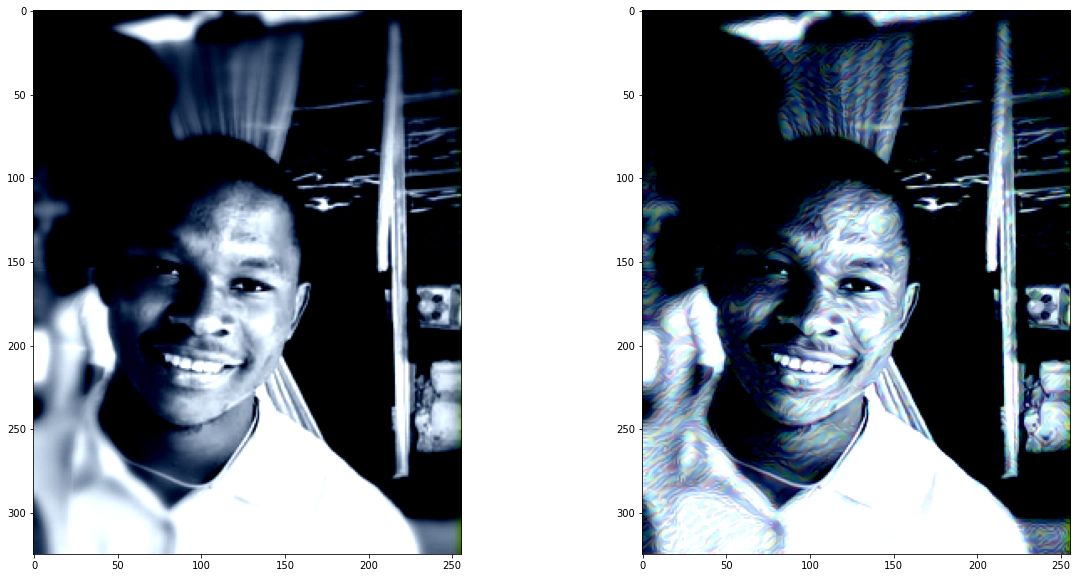

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(tensor_to_image(content_img))
ax2.imshow(tensor_to_image(target))

